# CS6330 Project 1: Reinforcement Learning Blackjack Agent

In [1]:
import blackjack
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The goal of this project is to build an intelligent Blackjack player using reinforcement (q-) learning.

## Control experiment

For a control experiment, we'll build a Blackjack player who, per basic Blackjack strategy, hits up to 17, then stands. The dealer will also play this way. This is a _simplified_ version of Blackjack, where we'll treat the deck as a "continuous shuffle" shoe, meaning that each card dealt is a random choice from 52 cards, meaning that the same card twice in a row is possible, but very improbable (though it would be an interesting future experiment to observe how the policy changes should the game use 1-, 2-, 4-deck shoes (and so on) with shuffling taking place when the deck is exhausted). We'll simulate 1,000 hands and see how the player performs.

In [14]:
games = list()

for x in range(0, 1000):
    games.append(blackjack.Game().play_hand())

In [15]:
df = pd.DataFrame(games)
df.head()

,winner,player_score,dealer_score,player_cards,dealer_cards
0,player,20,19,"[Rank.SEVEN, Rank.FOUR, Rank.NINE]","[Rank.NINE, Rank.FACE]"
1,dealer,17,20,"[Rank.SEVEN, Rank.FACE]","[Rank.TWO, Rank.THREE, Rank.FACE, Rank.FIVE]"
2,player,21,23,"[Rank.ACE, Rank.FACE]","[Rank.THREE, Rank.FACE, Rank.FACE]"
3,player,18,17,"[Rank.SEVEN, Rank.ACE]","[Rank.EIGHT, Rank.NINE]"
4,dealer,23,19,"[Rank.TWO, Rank.SIX, Rank.SEVEN, Rank.EIGHT]","[Rank.ACE, Rank.THREE, Rank.NINE, Rank.SIX]"


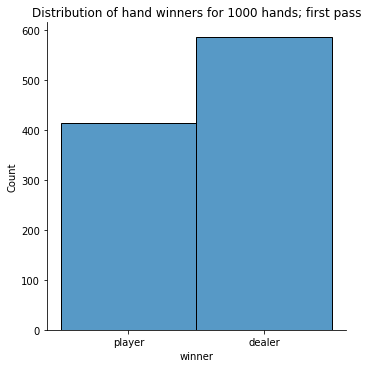

In [20]:
sns.displot(df['winner'])
plt.title('Distribution of hand winners for 1000 hands; first pass')
plt.show()

In [28]:
dealer_win = df['winner'].value_counts()['dealer'] / 1000. * 100
player_win = df['winner'].value_counts()['player'] / 1000. * 100
print(f"Player win percentage: {(player_win):.2f}%")
print(f"Dealer win percentage: {(dealer_win):.2f}%")
print(f"House edge: {(dealer_win - 50):.2f}%")

Player win percentage: 41.40%
Dealer win percentage: 58.60%
House edge: 8.60%


### Measuring the house edge

As a casino game, the rules of Blackjack set up to give the dealer (the _house_) an advantage (an _edge_). Meaning that, after enough games, we'll observe the house averaging out to win a certain percentage over 50%, but never under (hence why gambling is always a bad decision). In a real game of Blackjack, i.e with good player strategy, splits, double-downs, 3:2 payouts on natural Blackjacks, etc, this can be well under 5%, but for this first pass, we got 8.6%. Let's measure the house edge in the following experiments to see if a player whose moves are governed by a Q-learning policy can learn to play better, quantitatively measured by a reduction in the house edge.

## Q-learning experiment

TODO

In [2]:
blackjack.RewardsTable().table

[{'current_state': 1, 'next_state': 1, 'action': 'stand', 'reward': 1},
 {'current_state': 1, 'next_state': 2, 'action': 'hit', 'reward': 2},
 {'current_state': 1, 'next_state': 3, 'action': 'hit', 'reward': 3},
 {'current_state': 1, 'next_state': 4, 'action': 'hit', 'reward': 4},
 {'current_state': 1, 'next_state': 5, 'action': 'hit', 'reward': 5},
 {'current_state': 1, 'next_state': 6, 'action': 'hit', 'reward': 6},
 {'current_state': 1, 'next_state': 7, 'action': 'hit', 'reward': 7},
 {'current_state': 1, 'next_state': 8, 'action': 'hit', 'reward': 8},
 {'current_state': 1, 'next_state': 9, 'action': 'hit', 'reward': 9},
 {'current_state': 1, 'next_state': 10, 'action': 'hit', 'reward': 10},
 {'current_state': 1, 'next_state': 11, 'action': 'hit', 'reward': 11},
 {'current_state': 2, 'next_state': 2, 'action': 'stand', 'reward': 2},
 {'current_state': 2, 'next_state': 3, 'action': 'hit', 'reward': 3},
 {'current_state': 2, 'next_state': 4, 'action': 'hit', 'reward': 4},
 {'current_s